# Importing Important Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


### USING KERAS TO LOAD THE DATASET

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [5]:
# Normalizing the data and splitting it into train and valid
X_train, X_valid = X_train_full[:50000]/255.0, X_train_full[50000:]/255.0
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]
X_test = X_test/255.0

In [6]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

### CREATING THE MODEL USING THE SEQUENTIAL API

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [11]:
model.get_layer('dense_9') is hidden1

ValueError: No such layer: dense_9

In [12]:
weights, biases = hidden1.get_weights()
weights, weights.shape

(array([[-0.03288947, -0.06466217,  0.0643857 , ..., -0.02955657,
         -0.04844825,  0.0492245 ],
        [ 0.04640375, -0.01106936, -0.03210606, ..., -0.06170822,
          0.00346211, -0.02927677],
        [ 0.03404269, -0.05168827, -0.07237899, ...,  0.02747706,
          0.05080871, -0.06407193],
        ...,
        [-0.00827176, -0.04941835,  0.03952164, ..., -0.074325  ,
          0.06071268,  0.07065034],
        [-0.02501577, -0.06664846,  0.0594725 , ..., -0.07175223,
         -0.04774383, -0.07266739],
        [ 0.00015233,  0.0409596 , -0.04244716, ...,  0.05426042,
          0.0397211 ,  0.02663284]], dtype=float32),
 (784, 300))

In [13]:
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

### COMPILING THE MODEL

In [14]:
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = 'adam', metrics = ['accuracy'])

In [15]:
history  = model.fit(X_train, y_train, epochs=5,
                     validation_data = (X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 5s 106us/sample - loss: 0.4979 - accuracy: 0.8213 - val_loss: 0.4626 - val_accuracy: 0.8306
Epoch 2/5
50000/50000 [==============================] - 5s 93us/sample - loss: 0.3699 - accuracy: 0.8652 - val_loss: 0.3863 - val_accuracy: 0.8655
Epoch 3/5
50000/50000 [==============================] - 5s 91us/sample - loss: 0.3314 - accuracy: 0.8761 - val_loss: 0.3585 - val_accuracy: 0.8711
Epoch 4/5
50000/50000 [==============================] - 5s 91us/sample - loss: 0.3049 - accuracy: 0.8861 - val_loss: 0.3482 - val_accuracy: 0.8735
Epoch 5/5
50000/50000 [==============================] - 5s 91us/sample - loss: 0.2886 - accuracy: 0.8919 - val_loss: 0.3307 - val_accuracy: 0.8803


### Plotting Statistics

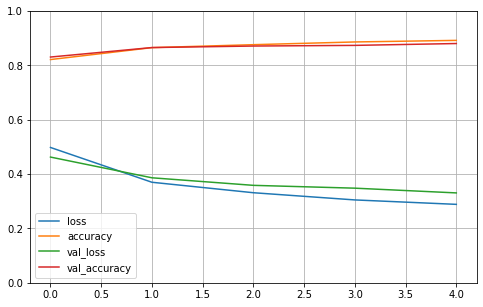

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [17]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3589 - accuracy: 0.8746


[0.35891627522706987, 0.8746]

### USING THE MODEL TO MAKE PREDICTIONS

In [18]:
X_new = X_test[:3]
y_proba = model.predict_proba(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [19]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [20]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Building a Regression MLP Using the Sequential API

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape, y_train.shape

((11610, 8), (11610,))

In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
    keras.layers.Dense(1)
])

model.compile(loss = "mse", optimizer = "adam")

history = model.fit(X_train, y_train, epochs=5, 
                    batch_size=64, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 52us/sample - loss: 2.5327 - val_loss: 1.6044
Epoch 2/5
11610/11610 [==============================] - 0s 25us/sample - loss: 0.8420 - val_loss: 0.9485
Epoch 3/5
11610/11610 [==============================] - 0s 26us/sample - loss: 0.6566 - val_loss: 0.6728
Epoch 4/5
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5477 - val_loss: 0.5501
Epoch 5/5
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4811 - val_loss: 0.4982


In [24]:
mse_test = model.evaluate(X_test, y_test)
mse_test

5160/5160 [==============================] - 0s 26us/sample - loss: 0.4796


0.47962325437124387

In [25]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

### Building Complex Models Using the Functional API

In [26]:
input_ = keras.layers.Input(shape=X_train.shape[1])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

### Using the Subclassing API to Build Dynamic Models

In [27]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu'):
        super().__init__()
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate()([input_A, hidden2])
        aux_output = self.aux_output(hidden2)
        main_output = self.main_output(concat)
        
        return main_output, aux_output
    
model = WideAndDeepModel()

### Saving and Restoring a Model

In [28]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="adam")
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=5,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 115us/sample - loss: 1.8958 - output_1_loss: 1.8046 - output_2_loss: 2.7109 - val_loss: 0.7602 - val_output_1_loss: 0.6791 - val_output_2_loss: 1.4894
Epoch 2/5
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5830 - output_1_loss: 0.5644 - output_2_loss: 0.7491 - val_loss: 0.6230 - val_output_1_loss: 0.5602 - val_output_2_loss: 1.1876
Epoch 3/5
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4641 - output_1_loss: 0.4445 - output_2_loss: 0.6396 - val_loss: 0.4801 - val_output_1_loss: 0.4466 - val_output_2_loss: 0.7821
Epoch 4/5
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4162 - output_1_loss: 0.4012 - output_2_loss: 0.5512 - val_loss: 0.4447 - val_output_1_loss: 0.4188 - val_output_2_loss: 0.6775
Epoch 5/5
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3933 - output_1_loss: 0.3797

In [29]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
total_loss, main_loss, aux_loss

5160/5160 [==============================] - 0s 33us/sample - loss: 0.4000 - output_1_loss: 0.3873 - output_2_loss: 0.5117


(0.3999577644721482, 0.38733235, 0.5116787)

In [30]:
model.save_weights("my_keras_model_weights.model")

In [31]:
model2 = WideAndDeepModel()
model2.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="adam")
model2.load_weights("my_keras_model_weights.model")

### Using Callbacks

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
    keras.layers.Dense(1)
])

model.compile(loss = "mse", optimizer = "adam")

In [33]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 1s 62us/sample - loss: 1.7558
Epoch 2/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.6011
Epoch 3/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4898
Epoch 4/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4323
Epoch 5/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4017
Epoch 6/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3888
Epoch 7/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3831
Epoch 8/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3735
Epoch 9/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3677
Epoch 10/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3631


OSError: SavedModel file does not exist at: my_keras_model.h5/{saved_model.pbtxt|saved_model.pb}

In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
# history = model.fit(X_train, y_train, epochs=100,
#                     validation_data=(X_valid, y_valid),
#                     callbacks=[checkpoint_cb, early_stopping_cb])

In [35]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))